In [1]:
# import libraries
import tensorflow as tf
print(tf.__version__)
from sklearn import datasets
from sklearn import preprocessing
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot
from statsmodels.tsa.stattools import kpss, adfuller
from statsmodels.tsa.seasonal import STL
from pylab import rcParams
from platform import python_version

2.8.0


In [2]:
df = pd.read_csv("_eir_dataset/thesis_data.csv")
print(df.head(5),"\n")

           Datetime   AG_MW      REGION
0  16-02-2022 00:00  4959.0  All Island
1  16-02-2022 00:15  4984.0  All Island
2  16-02-2022 00:30  5063.0  All Island
3  16-02-2022 00:45  5068.0  All Island
4  16-02-2022 01:00  5014.0  All Island 



In [167]:
# dataframe = pd.DataFrame(df)

In [3]:
df.dtypes

Datetime     object
AG_MW       float64
 REGION      object
dtype: object

In [4]:
df.head(1)

,Datetime,AG_MW,REGION
0,16-02-2022 00:00,4959.0,All Island


In [5]:
# rename the timestamp column
# dataframe.rename (columns= ({'DATE & TIME': 'Datetime'}), inplace=True)

In [6]:
# df.head(5)
print(df)

              Datetime   AG_MW      REGION
0     16-02-2022 00:00  4959.0  All Island
1     16-02-2022 00:15  4984.0  All Island
2     16-02-2022 00:30  5063.0  All Island
3     16-02-2022 00:45  5068.0  All Island
4     16-02-2022 01:00  5014.0  All Island
...                ...     ...         ...
5667  16-04-2022 11:30  4842.0  All Island
5668  16-04-2022 11:45  4727.0  All Island
5669  16-04-2022 12:00  4641.0  All Island
5670  16-04-2022 12:15  4568.0  All Island
5671  16-04-2022 12:30  4509.0  All Island

[5672 rows x 3 columns]


In [7]:
# Let us drop the third column
df.drop(df.columns[2],axis=1,inplace=True)

In [8]:
# Data After removing the REGION column
df.head(5)


,Datetime,AG_MW
0,16-02-2022 00:00,4959.0
1,16-02-2022 00:15,4984.0
2,16-02-2022 00:30,5063.0
3,16-02-2022 00:45,5068.0
4,16-02-2022 01:00,5014.0


In [12]:
print(df.shape)
print(df.dtypes)
df.head()

(5672, 2)
Datetime     object
AG_MW       float64
dtype: object


,Datetime,AG_MW
0,16-02-2022 00:00,4959.0
1,16-02-2022 00:15,4984.0
2,16-02-2022 00:30,5063.0
3,16-02-2022 00:45,5068.0
4,16-02-2022 01:00,5014.0


We can see that there are 1,21,273 rows with 2 columns

In [14]:
# Examine the initial Data
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5672 entries, 0 to 5671
Columns: 2 entries, Datetime to AG_MW
dtypes: float64(1), object(1)
memory usage: 88.8+ KB


In [15]:
# describe the data

df.describe()

,AG_MW
count,5668.000000
mean,4785.447601
std,765.016435
min,2584.000000
25%,4176.750000
50%,4791.000000
75%,5343.250000
max,6884.000000


# check if there is any empty feature

In [75]:
df.isnull()

,MonthlyAverage
Datetime,
2021-12-31,False
2022-01-31,False
2022-02-28,False
2022-03-31,False
2022-04-30,False
2022-05-31,False
2022-06-30,False
2022-07-31,False
2022-08-31,False


We can see that there are no empty columns

In [18]:
# let us see the date time format
df['Datetime'] = df.Datetime.astype('datetime64[ns]')
print(df.dtypes)
df.head()

Datetime    datetime64[ns]
AG_MW              float64
dtype: object


,Datetime,AG_MW
0,2022-02-16 00:00:00,4959.0
1,2022-02-16 00:15:00,4984.0
2,2022-02-16 00:30:00,5063.0
3,2022-02-16 00:45:00,5068.0
4,2022-02-16 01:00:00,5014.0


# Let us see the start and end date_time of data

In [19]:
df['Datetime'].describe(datetime_is_numeric=True)

count                             5672
mean     2022-04-22 21:54:14.248942080
min                2022-01-03 00:00:00
25%                2022-02-26 18:26:15
50%                2022-03-23 23:37:30
75%                2022-05-04 05:18:45
max                2022-12-04 23:45:00
Name: Datetime, dtype: object

The start date is from 1st March 2022 to 12th April, 2022

# Plotting with Time

let us plot energy observation against the data time records

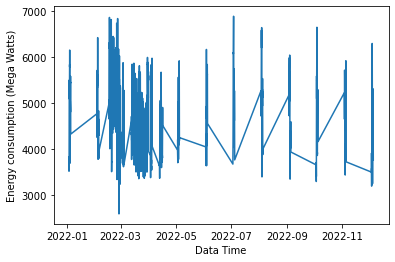

In [27]:
x_axis = sns.lineplot(data=df, x='Datetime', y='AG_MW' )

plt.xlabel('Data Time')
plt.ylabel('Energy consumption (Mega Watts)')

plt.show()

In [28]:
df['date'] = pd.to_datetime(df['Datetime'],format='%d%m%Y')
df['year'] = pd.DatetimeIndex(df['Datetime']).year
df['month'] = pd.DatetimeIndex(df['Datetime']).month

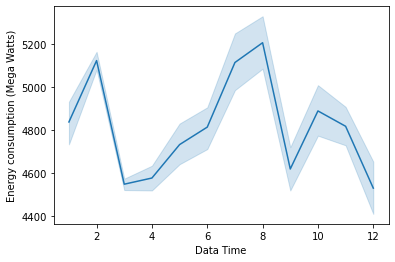

In [31]:
x_axis = sns.lineplot(data=df, x=df['month'], y='AG_MW' )

plt.xlabel('Data Time')
plt.ylabel('Energy consumption (Mega Watts)')

plt.show()

# let us define quarter column to dataframe for seasonal plotting

In [32]:
df['Quater'] = df['Datetime'].dt.quarter
df.head()

,Datetime,AG_MW,date,year,month,Quater
0,2022-02-16 00:00:00,4959.0,2022-02-16 00:00:00,2022,2,1
1,2022-02-16 00:15:00,4984.0,2022-02-16 00:15:00,2022,2,1
2,2022-02-16 00:30:00,5063.0,2022-02-16 00:30:00,2022,2,1
3,2022-02-16 00:45:00,5068.0,2022-02-16 00:45:00,2022,2,1
4,2022-02-16 01:00:00,5014.0,2022-02-16 01:00:00,2022,2,1


resampling the data into monthly for visual interpretation

In [55]:
# average_monthly_format
# df = pd.read_csv("_eir_dataset/thesis_data.csv", parse_dates=["Date"], index_col="Datetime")

df = df.resample('M').mean().rename(columns = {'AG_MW' : 'MonthlyAverage'} )
# df['Quater'] = df['Quater'].astype(int)
df.head()

,MonthlyAverage
Datetime,
2021-12-31,4837.203125
2022-01-31,4752.505208
2022-02-28,4941.677976
2022-03-31,4615.562012
2022-04-30,4605.015325


# display monthly average consumption of electricity

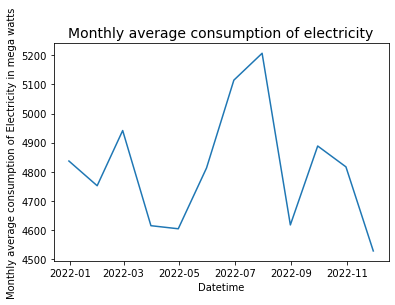

In [56]:
axis = sns.lineplot(data=df, x='Datetime', y='MonthlyAverage' )
plt.xlabel('Datetime')
plt.ylabel('Monthly average consumption of Electricity in mega watts')
plt.title("Monthly average consumption of electricity", fontsize=14)
plt.show()

# Lag Plot

A lag plot is used to observe the underlying properties of a timeseries. It's a type of scatter plot where a set of data from time step y(t+i) , with time t and lag i, is plotted against data from a later time step y(t). The pattern in a lag plot will show if the timeseries data is
# random, sinusoidal, autocorrelates, or contains outliers.
These patterns also provide information on suitable models for the data.

In [60]:
# plt.figure(figsize=(12,12))

# for i in range(1, 10):
#     ax=plt.subplot(3, 3, i)
#     # Create a lag plot for each quarter
# #     pd.plotting.lag_plot(df.loc[df['Quater'] == 1, 'MonthlyAverage'], lag=i, c='firebrick', label='Q1')    
# #     pd.plotting.lag_plot(df.loc[df['Quater'] == 2, 'MonthlyAverage'], lag=i, c='olive', label='Q2')
# #     pd.plotting.lag_plot(df.loc[df['Quater'] == 3, 'MonthlyAverage'], lag=i, c='navy', label='Q3')
# #     pd.plotting.lag_plot(df.loc[df['Quater'] == 4, 'MonthlyAverage'], lag=i, c='gold', label='Q4')
#     ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
#     ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
#     plt.legend()
#     plt.title(f'Lag {i}')

# plt.tight_layout()
# plt.show()

The positive linear relationship in lags 3, 6, and 9 demonstrates autocorrelation at regular intervals. This suggests that the data has seasonality (non-stationary) and rules out randomness. We can further verify this with an autocorrelation plot.

# Auto correlation Plot

The autocorrelation plot is similar to the lag plot in that it also checks for randomness in the timeseries. Autocorrelations are calculated for the data at different lags. A completely random timeseries will show autocorrelations near zero for all lags.

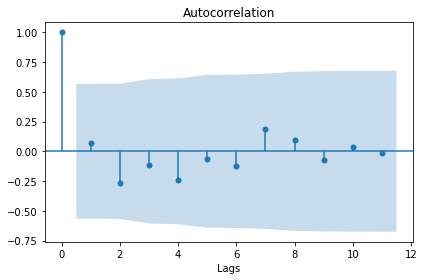

In [61]:
# Select a multiple of the seasonal frequency for the number of lags
plot_acf(df['MonthlyAverage'])
plt.xlabel('Lags')
plt.tight_layout()
plt.show()

The plot shows some significant non-zero autocorrelations. We see an oscillation of negative and positive correlation values. A closer look reveals large autocorrelations at multiples of the seasonal frequency (3). This is another indicator of seasonality.

# Partial Autocorrelation Plot

Partial autocorrelation is also a calculation for data at different lags, but with indirect correlations removed. This plot can be used to specify a regression model for the timeseries. The first autocorrelations are typically the most significant for analysis.

In [63]:
# plot_pacf(df['MonthlyAverage'])
# plt.xlabel('Lags')
# plt.tight_layout()
# plt.show()

As displayed above the partial autocorrelation shows only the direct relationship between a timstep and its lag. The indirect relations are less significant and fall closer to zero.

When deciding on a regression model, the timeseries will need to undergo a transformation known as differencing to remove any seasonality or trend. This will make the data stationary (no trend or seasonality) and better suited for modeling.

# Kwiatkowski-Phillips-Schmidt-Shin Test

The Kwiatkowski-Phillips-Schmidt-Shin Test (KPSS) checks for the stationarity of a timeseries by testing the null hypothesis that the data is stationary about a trend. A p-value above 0.05 indicates the data is trend-stationary. We'll set up metric tables for our differenced data and view the results.

In [64]:
def kpss_test(timeseries):
    # Create a metrics table for kpss test
    print('KPSS Metrics:')    
    kpsstest = kpss(timeseries, regression='c', nlags='auto')
    kpss_output = pd.Series(
        kpsstest[0:3], 
        index = ['Test Statistic', 
               'p-Value', 
               'Number of Lags'
        ]
    )
    
    for key, value in kpsstest[3].items():
        kpss_output[f'Critical Value ({key})'] = value
    
    return kpss_output

In [65]:
diff = df['MonthlyAverage'].diff(1).dropna()
# diff.head()

kpss_test(diff)

KPSS Metrics:


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Test Statistic           0.178888
p-Value                  0.100000
Number of Lags           2.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64

The large p-value is above 0.05, which means our differenced data is trend-stationary. The null hypothesis is accepted.

# Augmented Dickey-Fuller Test

The second of our stationarity tests is the Augmented Dickey-Fuller (ADF) Test. This test assumes the data is non-stationary as the null hypothesis. A p-value below 0.05 indicates a stationary timeseries. This is opposite the KPSS test so care must be taken when making conclusions.

In [66]:
def adf_test(timeseries):
    # Create a metrics table for adf test
    print('Dickey-Fuller Metrics:')    
    adftest = adfuller(timeseries, autolag='AIC')
    adfoutput = pd.Series(
        adftest[0:4],
        index = [
            'Test Statistic',
            'p-Value',
            'Number of Lags',
            'Number of Observations'
        ]
    )
    
    for key, value in adftest[4].items():
        adfoutput[f'Critical Value ({key})'] = value
    
    return adfoutput

In [67]:
adf_test(diff)

Dickey-Fuller Metrics:


Test Statistic            -3.573080
p-Value                    0.006297
Number of Lags             0.000000
Number of Observations    10.000000
Critical Value (1%)       -4.331573
Critical Value (5%)       -3.232950
Critical Value (10%)      -2.748700
dtype: float64

Here we see the small p-value is below 0.05 so the null hypothesis is rejected. Both ADF and KPSS tests verify that the data is stationary so a second-order differencing is not needed.

# Seasonal Plotting

Quater Plotting

In [70]:
# fig, ax = plt.subplots()
# sns.lineplot(ax=ax, data=df, x='SM', y='MonthlyAverage', ci=95)
# ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
# ax.set_xticks([1,2,3,4])
# ax.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])
# ax.set_ylabel('Average Energy Consumption in Mega Watts')
# ax.set_xlabel('Seasonal Quarter')
# ax.set_title('Avg Electricity Consumption')
# plt.show()

Month Wise Plotting

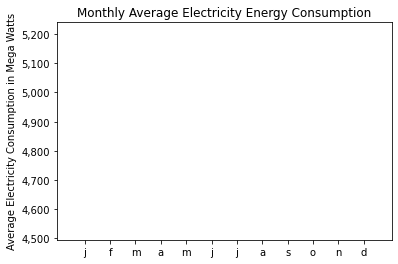

In [74]:
fig, ax = plt.subplots()
month_plot(df['MonthlyAverage'], ax=ax)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Monthly Average Electricity Energy Consumption')
plt.ylabel('Average Electricity Consumption in Mega Watts')
plt.show()

We can see that February is the month where peak average energy usage occurs. December, January sees the highest usage out of the winter months, and the lowest points are in April and October to november. Overall, this is a close reflection of the pattern observed in the quarter plot.